<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#calculating-ratio-of-fan-OR-blotch-markings-to-ALL-markings" data-toc-modified-id="calculating-ratio-of-fan-OR-blotch-markings-to-ALL-markings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>calculating ratio of fan OR blotch markings to ALL markings</a></span></li></ul></div>

## calculating ratio of fan OR blotch markings to ALL markings

In [1]:
from planet4 import io

In [2]:
db = io.DBManager()

In [3]:
db.dbname

'/Users/klay6683/Dropbox/data/planet4/2016-05-29_planet_four_classifications_queryable_cleaned_seasons2and3.h5'

In [7]:
image_ids = db.image_ids

In [11]:
len(image_ids)

42904

In [55]:
chosen = np.random.choice(image_ids, 10000)

In [29]:
def get_fan_and_blotch_nunique_cids(data):
    f1 = data.marking == 'fan'
    f2 = data.marking == 'blotch'
    return data[f1 | f2].classification_id.nunique()

In [30]:
from ipyparallel import Client
c = Client()

In [31]:
lbview = c.load_balanced_view()

In [32]:
dview = c[:]

In [34]:
dview.push({'db': db,
            'get_fan_and_blotch_nunique_cids':get_fan_and_blotch_nunique_cids})

<AsyncResult: _push>

In [42]:
def get_ratio(image_id):
    data = db.get_image_id_markings(image_id)
    n_classifications = data.classification_id.nunique()
    n_class_fb = get_fan_and_blotch_nunique_cids(data)
    ratio = (n_class_fb / n_classifications)
    d = {'image_id':image_id, 'ratio':ratio}
    return d

In [56]:
results = lbview.map_async(get_ratio, chosen)

In [57]:
from nbtools import display_multi_progress

In [58]:
display_multi_progress(results, chosen)

In [59]:
df = pd.DataFrame(results.result())

In [60]:
%matplotlib inline

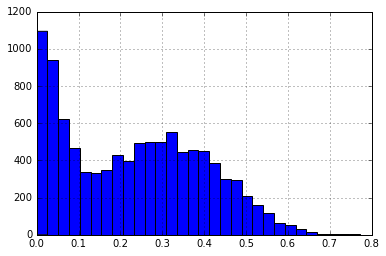

In [62]:
df.ratio.hist(bins=30)

In [70]:
import seaborn as sns

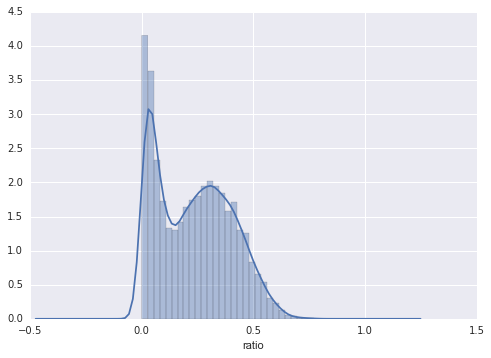

In [79]:
sns.distplot(df.ratio)

In [80]:
t0 = pd.Timestamp('2016-07-01 12:00:00')

In [86]:
delta = pd.Timedelta('114h')

In [87]:
t0 + delta

Timestamp('2016-07-06 06:00:00')